Lambda School Data Science

*Unit 4, Sprint 1, Module 3*

---

# Document Classification (Assignment)

This notebook is for you to practice skills during lecture.

Today's guided module project and assignment will be different. You already know how to do classification. You ready know how to extract features from documents. So? That means you're ready to combine and practice those skills in a kaggle competition. We we will open with a five minute sprint explaining the competition, and then give you 25 minutes to work. After those twenty five minutes are up, I will give a 5-minute demo an NLP technique that will help you with document classification (*and **maybe** the competition*).

Today's all about having fun and practicing your skills.

## Sections
* <a href="#p1">Part 1</a>: Text Feature Extraction & Classification Pipelines
* <a href="#p2">Part 2</a>: Latent Semantic Indexing
* <a href="#p3">Part 3</a>: Word Embeddings with Spacy
* <a href="#p4">Part 4</a>: Post Lecture Assignment

# Text Feature Extraction & Classification Pipelines (Learn)
<a id="p1"></a>

## Follow Along 

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model (try using the pipe method I just demoed)

[Lecture Link](https://youtu.be/QemqRhPEVDk?t=2623)

### Load Competition Data

In [1]:
import pandas as pd
from IPython.display import YouTubeVideo

# You may need to change the path
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
print(train.shape, test.shape)

(4087, 3) (1022, 2)


In [2]:
train.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1


In [3]:
# Distribution of ratingCategory: 0 (Excellent), 1 (Good), 2 (Poor)
train.ratingCategory.value_counts(normalize=True)

1    0.704918
0    0.279178
2    0.015904
Name: ratingCategory, dtype: float64

In [4]:
# Read a few reviews from the "Excellent" category
pd.set_option('display.max_colwidth', 0)
train[train.ratingCategory == 0].sample(3)

,id,description,ratingCategory
2730,4205,"\nThis is one of the more intriguing of the Double Barrel series, because while the others either complement each other or don’t,\r\nthis has a depth to it that you need to look for. At first it’s all Laphroaig, and the peat and sea burst out of the glass. But just as you’re asking yourself what the point is, the fruity notes of the Mortlach cushion the whole landing and let you down gently. Impressive. £48",0
1624,4638,"\nA mild nose with hints of caramel and dry grasses just vaguely suggests the flavors that wait in the glass. The sweetness of navel oranges and slow-developing peppery notes lead into the classic Canadian combination of caramel, cloves, ginger, and white pepper. Earthy vegetal tones, almost like riverweeds, and a strong but pleasant bitterness are glazed with creamy Mackintosh caramel. Dusty grain and pepper fade quickly in a shortish finish.",0
1720,4275,"\nLight straw color, but its rich aroma contradicts its youthful color. Marshmallow and cotton candy really come out strong, quickly followed by decadent bakery aromas. Fresh-baked muffins, heavy whipping cream, and vanilla icing, with hints of caramelized barley and nutmeg. Its weaknesses are a slightly adhesive mouthfeel and short finish, but the pronounced flavors still make it a borderline sipper or a just-add-water whiskey. Sourced whiskey.",0


In [5]:
# Read a few reviews from the "Poor" category
train[train.ratingCategory == 2].sample(3)

,id,description,ratingCategory
3319,5084,"\nMaple syrup and gelatin capsules in a veterinarian’s office. Texas Spirit is WB Liquors’ (Costco) house brand and so, available in one size only: extra-large. A simple mixing whisky, it is sweet, floral, watery, and loaded with vanilla and caramel. Extra hot pepper throws it a bit out of balance, though it would likely go well with Coke. A young, unassuming whisky not to savor, but to session. Price is per 1.75 liter.",2
3867,5091,"\nEarthy, fleshy notes with brooding grape notes and a gamey finish -- the Nebbiolo grape influence is obvious. I enjoy Barolo wine and I enjoy Edradour whisky, but the flavors in this whisky mix like oil and water. (Exclusive to Binny’s Beverage Depot.)",2
1252,5053,"\nSo that’s what wheat smells like: not much. The aromas here seem to be mostly yeast-derived, with a faint ripe fruitiness (undefined: peach, apple?) and alcohol heat, and a touch of wheat-origin sweet grass. Wheat’s in the mouth, like chewing fresh grain with some water and alcohol. It’s all there, and the finish is sweet, and it’s clean, but…that’s about all. White bread whiskey.",2


In [6]:
print(train.head(1))
print()
print(test.head(1))

     id  \
0  1321   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description  \
0  \nSometimes, when whisky is batched, a few leftover barrels are returned to the warehouse. Canadian Club recently pulled and vatted several of these from the 1970s. Acetone, Granny Smith apples, and fresh-cut white cedar showcase this long age. Complex and spicy, yet reserved, this dram is ripe with strawberries, canned pears, cloves, pepper, and faint flowers, then slightly pulling oak tannins. Distinct, elegant, and remarkably vibrant, this ancien

## Explore the Data

<img align="right" src="https://github.com/vjmiyagi/vjmiyagi.github.io/blob/master/img/KaggleAssignment.png?raw=true" width=200>


[Lecture Link](https://youtu.be/QemqRhPEVDk?t=4355)


In [7]:
from explore_data import get_num_words_per_sample
from explore_data import plot_sample_length_distribution
from explore_data import plot_frequency_distribution_of_ngrams
from explore_data import plot_class_distribution
import seaborn as sns 
sns.set()

In [10]:
median_words_per_sample = get_num_words_per_sample(train.description.values)
print(f'Median words per sample: {median_words_per_sample}')

Median words per sample: 70.0


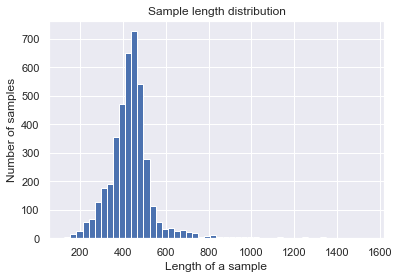

In [11]:
plot_sample_length_distribution(train.description.values)

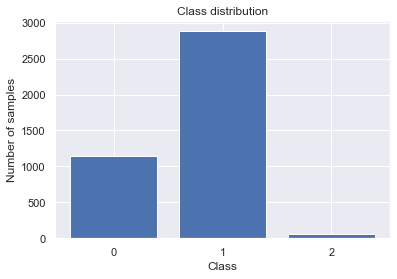

In [12]:
plot_class_distribution(train.ratingCategory.values)

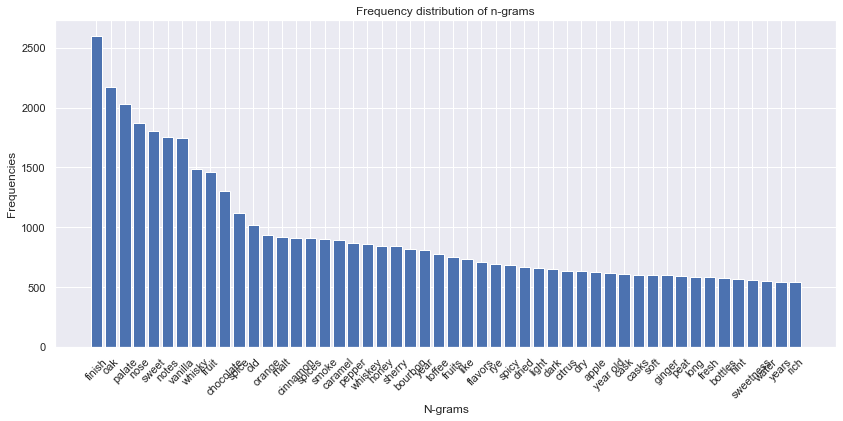

In [13]:
plot_frequency_distribution_of_ngrams(train.description.values,
                                      ngram_range=(1,2),
                                      num_ngrams=50)

<img align="right" src="https://github.com/vjmiyagi/vjmiyagi.github.io/blob/master/img/sw_ratio.png?raw=true" width=200>

[Lecture Link](https://youtu.be/QemqRhPEVDk?t=4449)




In [14]:
sw_ratio = len(train.description.values) / median_words_per_sample
print(f'Number of Samples / Median Words per Sample ratio: {int(sw_ratio)}')

Number of Samples / Median Words per Sample ratio: 58


### Split the Training Set into Train/Validation


<img align="right" src="https://github.com/vjmiyagi/vjmiyagi.github.io/blob/master/img/traintestsplit.png?raw=true" width=200>

[Lecture Link](https://youtu.be/QemqRhPEVDk?t=2754)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train['description'], 
                                                    train['ratingCategory'], 
                                                    test_size=0.2, 
                                                    stratify=train['ratingCategory'],
                                                    random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3269,) (818,) (3269,) (818,)


### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'vect__max_df': (0.3, 0.5),
    'vect__min_df': (2, 5, 10),
    'vect__max_features': (5000, 20000),
    'clf__penalty': ('l1', 'l2'),
    'clf__C': (0.1, 0.5, 1., 2.)
}

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(X_train, y_train)

### Make a Submission File
*Note:* In a typical Kaggle competition, you are only allowed two submissions a day, so you only submit if you feel you cannot achieve higher test accuracy. For this competition the max daily submissions are capped at **20**. Submit for each demo and for your assignment. 

In [ ]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [ ]:
# Make Sure the Category is an Integer
submission.head()

In [ ]:
subNumber = 0

In [ ]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./whiskey-reviews-dspt7/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

You're trying to achieve a minimum of 70% Accuracy on your model.

## Latent Semantic Indexing (Learn)
<a id="p2"></a>

## Follow Along
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
4. Make a submission to Kaggle 


### Define Pipeline Components

In [ ]:
vect = ...
svd = ...
clf = ...

pipe = Pipeline([
    ('vect', vect),      # TF-IDF Vectorizer
    ('svd', svd),        # Truncated SVD Dimensionality Reduction
    ('clf', rfc)         # RandomForest Classifier
])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [ ]:
parameters = {
    'lsi__svd__n_components': [10,100,250],
    'vect__max_df': (0.75, 1.0),
    'clf__max_depth':(5,10,15,20)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(..., ...)

### Make a Submission File

In [ ]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [ ]:
# Make Sure the Category is an Integer
submission.head()

In [ ]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./whiskey-reviews-dspt7/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

Continue to apply Latent Semantic Indexing (LSI) to various datasets. 

# Word Embeddings with Spacy (Learn)
<a id="p3"></a>

## Follow Along

In [ ]:
# Apply to your Dataset
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint

param_dist = {
    'max_depth' : randint(3,10),
    'min_samples_leaf': randint(2,15)
}

In [ ]:
# Continue Word Embedding Work Here

### Make a Submission File

In [ ]:
# Predictions on test sample
pred = ...predict(test['description'])

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [ ]:
# Make Sure the Category is an Integer
submission.head()

In [ ]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model
submission.to_csv(f'./whiskey-reviews-dspt7/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
    - Try to extract word embeddings with Spacy and use those embeddings as your features for a classification model.
4. Make a submission to Kaggle 

# Post Lecture Assignment
<a id="p4"></a>

Your primary assignment this afternoon is to achieve a minimum of 70% accuracy on the Kaggle competition. Once you have achieved 70% accuracy, please work on the following: 

1. Research "Sentiment Analysis". Provide answers in markdown to the following questions: 
    - What is "Sentiment Analysis"? 
    - Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response
    - How do create labeled sentiment data? Are those labels really sentiment?
    - What are common applications of sentiment analysis?
2. Research our why word embeddings worked better for the lecture notebook than on the whiskey competition.
    - This [text classification documentation](https://developers.google.com/machine-learning/guides/text-classification/step-2-5) from Google might be of interest
    - Neural Networks are becoming more popular for document classification. Why is that the case?